In [19]:
#constants and initial cond
import numpy as np
from matplotlib import pyplot as plt, cm
from solver import *

lx = 25     #length in the x direction
ly = 1      #length in the y direction
nx = 51     #grid points in x direction
ny = 21     #grid points in y direction
t = 50       #final time to calculate to
dx = lx / (nx - 1)
dy = ly / (ny - 1)
x = np.linspace(0, lx, nx)
y = np.linspace(0, ly, ny)
X, Y = np.meshgrid(x, y)

rho = 1
#nu = .1
Re = 1000  # Or whatever Reynolds number you want to simulate
dt = .001 #time step size
nt=int(t/dt)

ds=int(100) #number of steps after which results are saved


u = np.zeros((ny, nx)) #initial conditions 
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 

In [20]:
#imposing boundary conditions

#PRESSURE
pLeft=['N',0]
pRight=['D',0]
pTop=['N',0]
pBottom=['N',0]

pBCs=[pLeft,pRight,pTop,pBottom]
#pressureBC(pLeft,pRight,pTop,pBottom,p,dx,dy)

#VELOCITY

#x-component
uLeft=['D',1]
uRight=['N',0]
uTop=['D',0]
uBottom=['D',0]

uBCs=[uLeft,uRight,uTop,uBottom]
#XVelBC(uLeft,uRight,uTop,uBottom,u,dx,dy)

#y-component
vLeft=['D',0]
vRight=['D',0]
vTop=['D',0]
vBottom=['D',0]

#YVelBC(vLeft,vRight,vTop,vBottom,v,dx,dy)
vBCs=[vLeft,vRight,vTop,vBottom]

u = np.zeros((ny, nx)) #comment out these four lines if you want to run from last time step
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))
vel_mag=(u**2+v**2)**0.5


np.savetxt('p0.csv', p, delimiter=',')
np.savetxt('u0.csv', u, delimiter=',')
np.savetxt('v0.csv', v, delimiter=',')
np.savetxt('Umag0.csv', vel_mag, delimiter=',')

# solving
u, v, p = flow_solver(nt, u, v, dt, ds, dx, dy, p, rho, Re, pBCs, uBCs, vBCs)

clearResults()

Step 0, dt: 6.18812e-01, max U: 0.000, max V: 0.000
Step 1, dt: 2.50000e-01, max U: 1.000, max V: 0.000
Step 2, dt: 2.50000e-01, max U: 1.000, max V: 0.000
Step 3, dt: 2.50000e-01, max U: 1.000, max V: 0.000
Step 4, dt: 2.50000e-01, max U: 1.000, max V: 0.000
Step 5, dt: 2.50000e-01, max U: 1.000, max V: 0.000
Step 6, dt: 2.50000e-01, max U: 1.000, max V: 0.001
Step 7, dt: 2.50000e-01, max U: 1.000, max V: 0.002
Step 8, dt: 2.50000e-01, max U: 1.000, max V: 0.004
Step 9, dt: 2.50000e-01, max U: 1.000, max V: 0.006
Step 10, dt: 2.50000e-01, max U: 1.000, max V: 0.008
Step 11, dt: 2.50000e-01, max U: 1.000, max V: 0.011
Step 12, dt: 2.50000e-01, max U: 1.000, max V: 0.015
Step 13, dt: 2.38487e-01, max U: 1.048, max V: 0.017
Step 14, dt: 2.35673e-01, max U: 1.061, max V: 0.020
Step 15, dt: 2.34800e-01, max U: 1.065, max V: 0.021
Step 16, dt: 2.25624e-01, max U: 1.108, max V: 0.022
Step 17, dt: 2.28139e-01, max U: 1.096, max V: 0.023
Step 18, dt: 2.16253e-01, max U: 1.156, max V: 0.025
Ste

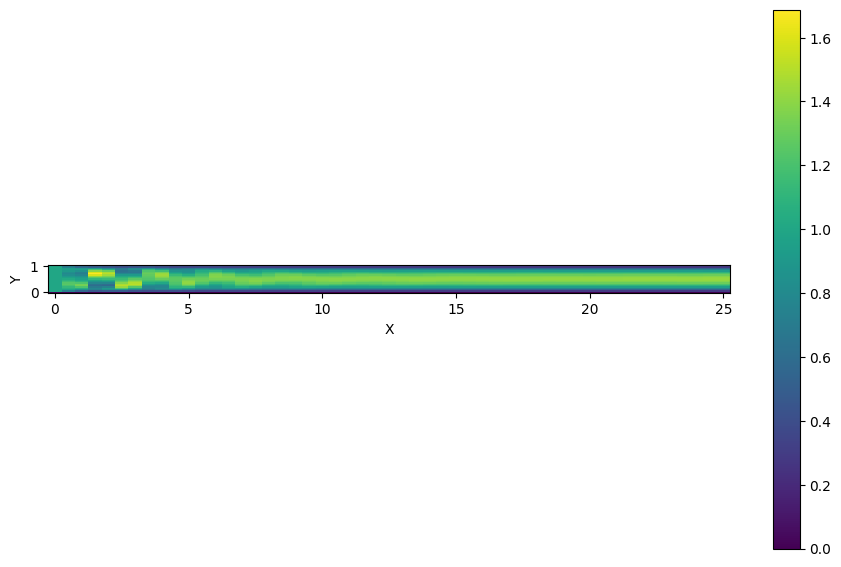

In [21]:
fig = plt.figure(figsize=(11,7), dpi=100)
# Plot velocity magnitude using pcolormesh for better resolution
plt.pcolormesh(X, Y, u, alpha=1, cmap=cm.viridis)
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
ax = plt.gca()
ax.set_aspect(1)
plt.show()

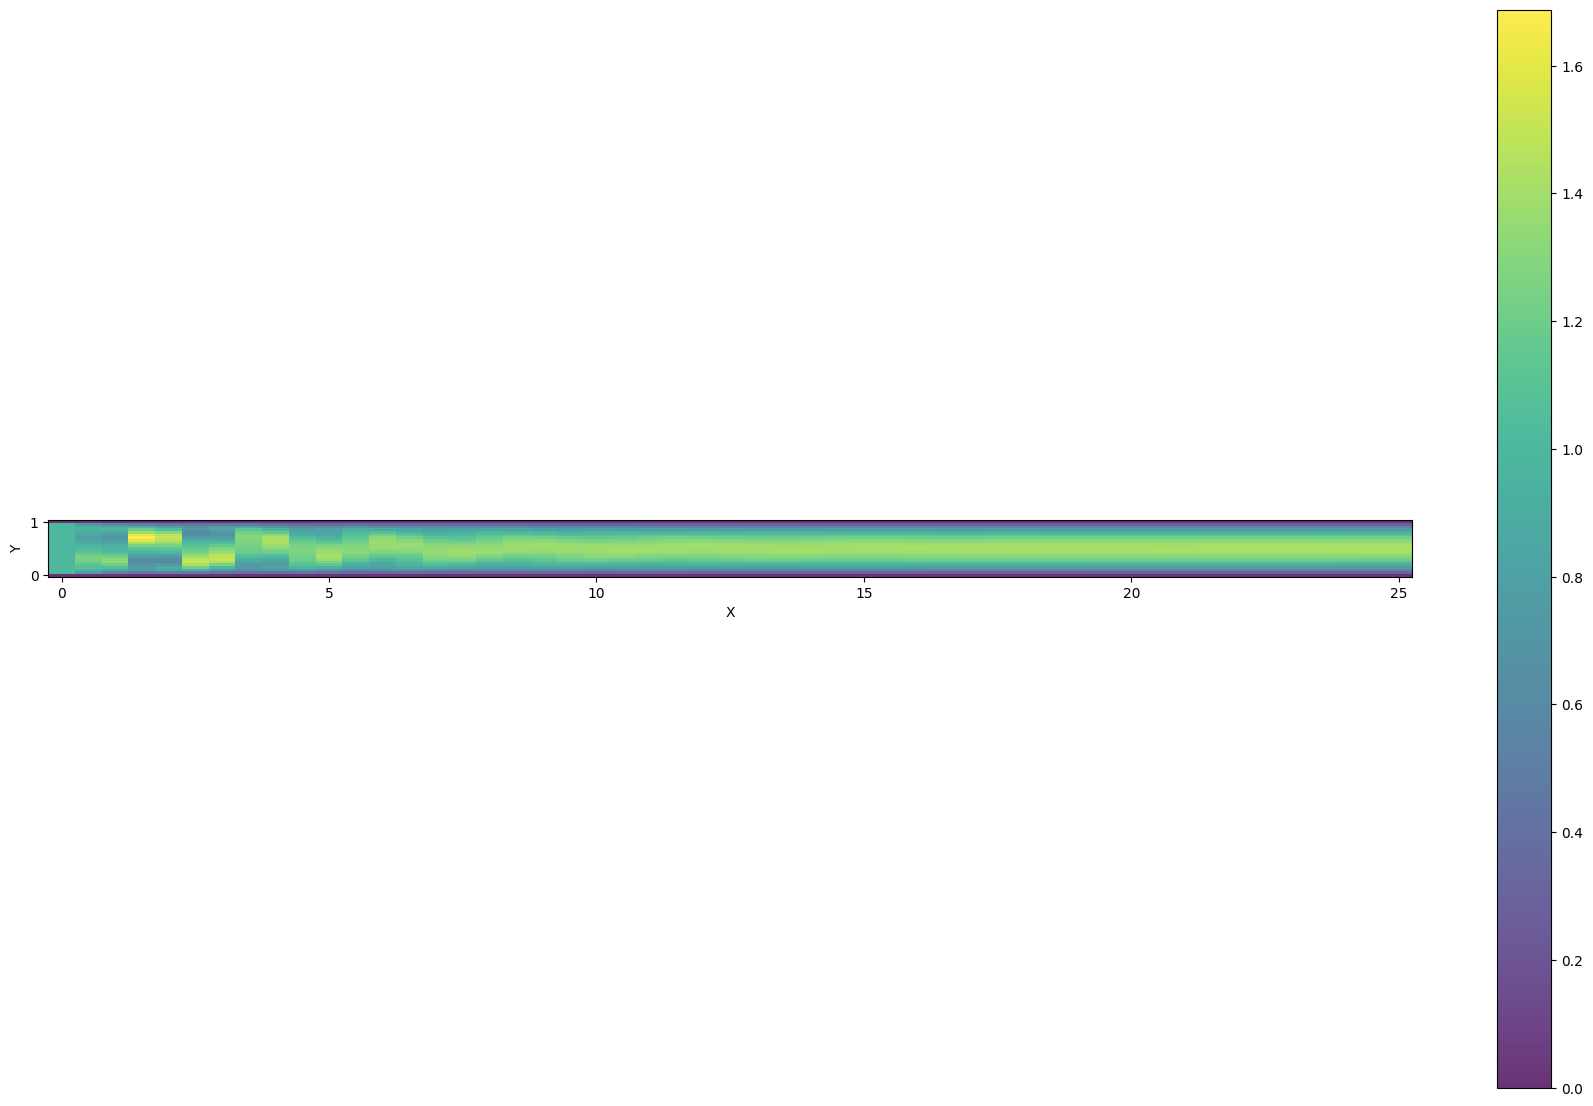

In [22]:
fig = plt.figure(figsize=(22,14),dpi=100)
# plotting the pressure field as a contour
#plt.contourf(X, Y, u, alpha=0.8, cmap=cm.viridis)
## plotting the pressure field outlines
plt.pcolormesh(X, Y, u, alpha=0.8, cmap=cm.viridis)
plt.colorbar()
## plotting velocity field
#plt.streamplot(X[::lx, ::2*ly], Y[::lx, ::2*ly], u[::lx, ::2*ly], v[::lx, ::2*ly])
plt.xlabel('X')
plt.ylabel('Y')
ax = plt.gca()
ax.set_aspect(1)
plt.show()

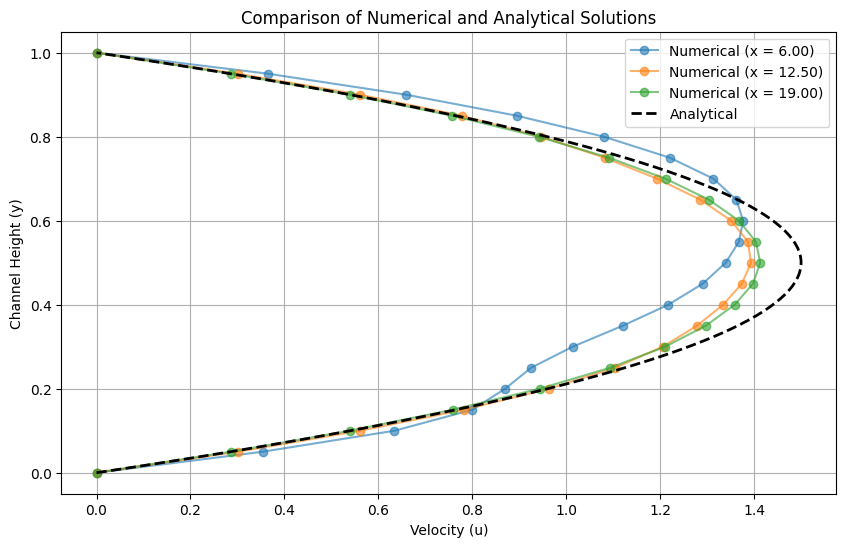

Maximum error: 0.113041
Mean error: 0.048782


In [23]:
def analytical_channel_flow(y, Re, dpdx):
    """
    Calculate analytical solution for channel flow
    y: y-coordinates (use dimensional coordinates)
    Re: Reynolds number
    dpdx: pressure gradient
    """
    # Convert Re*dpdx/2 to C using the relationship from the equation
    return - 6 * (y**2 - y)

# Get Reynolds number from parameters  # Re = U*H/nu, with U=1 and H=1
dpdx = -2/(Re)   # Choose dpdx to match inlet velocity of 1

# Calculate analytical solution
y_analytical = np.linspace(0, ly, 100)  # More points for smooth curve
u_analytical = analytical_channel_flow(y_analytical, Re, dpdx)

# Create comparison plot
plt.figure(figsize=(10, 6))

# Plot numerical solution at different x locations
x_locations = [nx//4, nx//2, 3*nx//4]
for i in x_locations:
    plt.plot(u[:,i], y, 'o-', label=f'Numerical (x = {x[i]:.2f})', alpha=0.6)

# Plot analytical solution
plt.plot(u_analytical, y_analytical, 'k--', label='Analytical', linewidth=2)

plt.xlabel('Velocity (u)')
plt.ylabel('Channel Height (y)')
plt.title('Comparison of Numerical and Analytical Solutions')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print error metrics
mid_x = nx//2  # Compare at channel midpoint
u_numerical_interp = np.interp(y_analytical, y, u[:, mid_x])
error = np.abs(u_numerical_interp - u_analytical)
max_error = np.max(error)
mean_error = np.mean(error)
print(f"Maximum error: {max_error:.6f}")
print(f"Mean error: {mean_error:.6f}")

## Saving the transient bevaviour as an animation

In [24]:
import pandas as pd
import matplotlib.animation as animation

fig, ax = plt.subplots(dpi=100)
levels=np.linspace(0,1.5,10)
def animate(i):
    tmpName='Umag'+str(i*ds)+'.csv'
    Tfile=pd.read_csv(r"Results/"+str(tmpName),header=None)
    Tarr=Tfile.to_numpy()
    # plotting the temperature field
    re = plt.contourf(X, Y, Tarr,levels, alpha=0.8, cmap=cm.viridis)
    #plt.xlabel('X')
    #plt.ylabel('Y')
    ax = plt.gca()
    ax.set_aspect(1)
    return re

anim = animation.FuncAnimation(fig, animate, frames=nt//ds, repeat=False)
anim.save(r'Gifs/channel_Umag.gif', writer='imagemagick', fps=10)


ModuleNotFoundError: No module named 'pandas'